In [3]:
%cd ..

c:\Code\Armband


In [15]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pickle
from utils.visualize import showHistory

results = pickle.load(open('train_results.pkl', 'rb'))

    

conv
Accuracy: [0.86846154 0.86653846 0.89       0.8725    ]
conv_gru
Accuracy: [0.90980769 0.92730769 0.9525     0.92      ]
conv_lstm
Accuracy: [0.94826923 0.93480769 0.97       0.945     ]
conv_rnn
Accuracy: [0.96769231 0.94769231 0.9625     0.89      ]
dense
Accuracy: [0.86307692 0.93903846 0.6575     0.8275    ]
gru
Accuracy: [0.55673077 0.87       0.4975     0.8625    ]
lstm
Accuracy: [0.60423077 0.87192308 0.555      0.86      ]
rnn
Accuracy: [0.88711538 0.92730769 0.5225     0.72      ]


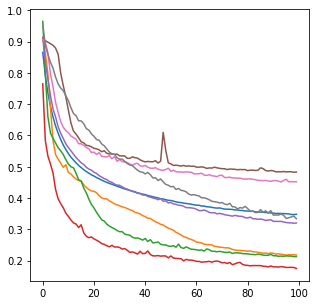

In [17]:
plt.rcParams["figure.figsize"] = [5, 5]
with plt.rc_context({'figure.facecolor':'white'}):
    for result in results:
        model_desc = result['model_descr']
        acc = result['acc']
        history = result['history']
        print(model_desc)
        print(f'Accuracy: {acc}')
        #print(history.keys())
        plt.plot(history['loss'])
    plt.show()
 